# Colombian Constitution EDA.

Brief resume about the methodology and the results that we got.

## About the Document

Little research about the context of the document.

## DS Pipeline



## Document Data Model

PowerPoint graph, meanwhile we can use the hierarchy of the articles dictionary

```
hierarchy = {
    'TITULO' : 'h1',
    'DISPOSICIONES' : 'h1',
    'CAPITULO' : 'h2',
    'ARTÍCULO' : 'p'

}
```

## EDA

### 1) Labels and quantity


In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

In [2]:
#import Dataset
df = pd.read_json('../constitucion_col_dict.json')

In [3]:
print("Shape of data=>",df.shape)
df.head(5)

Shape of data=> (439, 3)


h1  \
0  {'head': 'TITULO I
', 'name': 'DE LOS PRINCIPI...   
1  {'head': 'TITULO I
', 'name': 'DE LOS PRINCIPI...   
2  {'head': 'TITULO I
', 'name': 'DE LOS PRINCIPI...   
3  {'head': 'TITULO I
', 'name': 'DE LOS PRINCIPI...   
4  {'head': 'TITULO I
', 'name': 'DE LOS PRINCIPI...   

                             h2  \
0  {'head': None, 'name': None}   
1  {'head': None, 'name': None}   
2  {'head': None, 'name': None}   
3  {'head': None, 'name': None}   
4  {'head': None, 'name': None}   

                                             article  
0  {'name': 'Artículo 1', 'content': ['Artículo 1...  
1  {'name': 'Artículo 2', 'content': ['Artículo 2...  
2  {'name': 'Artículo 3', 'content': ['Artículo 3...  
3  {'name': 'Artículo 4', 'content': ['Artículo 4...  
4  {'name': 'Artículo 5', 'content': ['Artículo 5...

In [4]:
h1=df['h1'].apply(pd.Series)
h1.rename(columns={"head": "Titulos","name":"NombreTitulo"},inplace=True)
h2=df['h2'].apply(pd.Series)
h2.rename(columns={"head": "Capitulos","name":"NombreCapitulo"},inplace=True)
article=df['article'].apply(pd.Series)
article.rename(columns={"name": "Articulos","content":"Contenido"},inplace=True)

In [5]:
print("Shape of data=>",h1.shape)
print("Shape of data=>",h2.shape)
print("Shape of data=>",article.shape)

Shape of data=> (439, 2)
Shape of data=> (439, 2)
Shape of data=> (439, 2)


In [6]:
frames = [h1, h2, article]
df=pd.concat(frames, axis=1)
df.replace(r'\n','', regex=True,inplace=True) 
df['Contenido'] = df['Contenido'].str.join(',')

In [7]:
df.head(15)

Titulos                                  NombreTitulo   Capitulos  \
0    TITULO I               DE LOS PRINCIPIOS FUNDAMENTALES        None   
1    TITULO I               DE LOS PRINCIPIOS FUNDAMENTALES        None   
2    TITULO I               DE LOS PRINCIPIOS FUNDAMENTALES        None   
3    TITULO I               DE LOS PRINCIPIOS FUNDAMENTALES        None   
4    TITULO I               DE LOS PRINCIPIOS FUNDAMENTALES        None   
5    TITULO I               DE LOS PRINCIPIOS FUNDAMENTALES        None   
6    TITULO I               DE LOS PRINCIPIOS FUNDAMENTALES        None   
7    TITULO I               DE LOS PRINCIPIOS FUNDAMENTALES        None   
8    TITULO I               DE LOS PRINCIPIOS FUNDAMENTALES        None   
9    TITULO I               DE LOS PRINCIPIOS FUNDAMENTALES        None   
10  TITULO II  DE LOS DERECHOS, LAS GARANTIAS Y LOS DEBERES  CAPITULO 1   
11  TITULO II  DE LOS DERECHOS, LAS GARANTIAS Y LOS DEBERES  CAPITULO 1   
12  TITULO II  DE LOS DERECHOS, LAS GARANTIAS Y LOS DEBERES  CAPITULO 1   
13  TITULO II  DE LOS DERECHOS, LAS GARANTIAS Y LOS DEBERES  CAPITULO 1   
14  TITULO II  DE LOS DERECHOS, LAS GARANTIAS Y LOS DEBERES  CAPITULO 1   

                   NombreCapitulo    Articulos  \
0                            None   Artículo 1   
1                            None   Artículo 2   
2                            None   Artículo 3   
3                            None   Artículo 4   
4                            None   Artículo 5   
5                            None   Artículo 6   
6                            None   Artículo 7   
7                            None   Artículo 8   
8                            None   Artículo 9   
9                            None  Artículo 10   
10  DE LOS DERECHOS FUNDAMENTALES  Artículo 11   
11  DE LOS DERECHOS FUNDAMENTALES  Artículo 12   
12  DE LOS DERECHOS FUNDAMENTALES  Artículo 13   
13  DE LOS DERECHOS FUNDAMENTALES  Artículo 14   
14  DE LOS DERECHOS FUNDAMENTALES  Artículo 15   

                                            Contenido  
0   Artículo 1. Colombia es un Estado social de de...  
1   Artículo 2. Son fines esenciales del Estado: s...  
2   Artículo 3. La soberanía reside exclusivamente...  
3   Artículo 4. La Constitución es norma de normas...  
4   Artículo 5. El Estado reconoce, sin discrimina...  
5   Artículo 6. Los particulares sólo son responsa...  
6   Artículo 7. El Estado reconoce y protege la di...  
7   Artículo 8. Es obligación del Estado y de las ...  
8   Artículo 9. Las relaciones exteriores del Esta...  
9   Artículo 10. El castellano es el idioma oficia...  
10  Artículo 11. El derecho a la vida es inviolabl...  
11  Artículo 12. Nadie será sometido a desaparició...  
12  Artículo 13. Todas las personas nacen libres e...  
13  Artículo 14. Toda persona tiene derecho al rec...  
14  Artículo 15. Todas las personas tienen derecho...

In [8]:
print("Shape of data=>",df.shape)

Shape of data=> (439, 6)


In [9]:
df.set_index(['Titulos','Capitulos','Articulos'],inplace=True)
df.sort_index(inplace=True)

In [10]:
df.head()

NombreTitulo  \
Titulos                    Capitulos  Articulos                              
DISPOSICIONES TRANSITORIAS CAPITULO 1 Artículo transitorio 1          None   
                                      Artículo transitorio 10         None   
                                      Artículo transitorio 11         None   
                                      Artículo transitorio 12         None   
                                      Artículo transitorio 13         None   

                                                              NombreCapitulo  \
Titulos                    Capitulos  Articulos                                
DISPOSICIONES TRANSITORIAS CAPITULO 1 Artículo transitorio 1            None   
                                      Artículo transitorio 10           None   
                                      Artículo transitorio 11           None   
                                      Artículo transitorio 12           None   
                                      Artículo transitorio 13           None   

                                                                                                       Contenido  
Titulos                    Capitulos  Articulos                                                                   
DISPOSICIONES TRANSITORIAS CAPITULO 1 Artículo transitorio 1   Artículo transitorio 1. Convócase a elecciones...  
                                      Artículo transitorio 10  Artículo transitorio 10. Los decretos que expi...  
                                      Artículo transitorio 11  Artículo transitorio 11. Las facultades extrao...  
                                      Artículo transitorio 12  Artículo transitorio 12. Con el fin de facilit...  
                                      Artículo transitorio 13  Artículo transitorio 13. Dentro de los tres añ...

In [11]:
df.reset_index(inplace=True)

In [12]:
print('Titulos -->',df['Titulos'].unique())
print('Cantidad de Articulos -->', len(df['Articulos'].unique()))

Titulos --> ['DISPOSICIONES TRANSITORIAS' 'TITULO I' 'TITULO II' 'TITULO III'
 'TITULO IV' 'TITULO IX' 'TITULO V' 'TITULO VI' 'TITULO VII' 'TITULO VIII'
 'TITULO X' 'TITULO XI' 'TITULO XII' 'TITULO XIII']
Cantidad de Articulos --> 439


In [13]:
#Accent removing
df['Contenido'] = df['Contenido'].str.normalize('NFKD')\
       .str.encode('ascii', errors='ignore')\
       .str.decode('utf-8')


In [14]:
#Removing Articulo....
df['Contenido'].replace(r'[a-zA-Z\s]+\d+\.\s','', regex=True,inplace=True) 
df['Contenido'].replace(r'\n','', regex=True,inplace=True)
#lowerCase
df['Contenido'] = df['Contenido'].apply(lambda x:x.lower())
#digits Removal
df['Contenido'] = df['Contenido'].apply(lambda x: re.sub('\w*\d\w*','', x))

#Remove punctuations
df['Contenido'] = df['Contenido'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
#Remove extra spaces
df['Contenido'] = df['Contenido'].apply(lambda x: re.sub(' +',' ',x))

In [15]:
df['Contenido'].head()

0    convocase a elecciones generales del congreso ...
1    los decretos que expida el gobierno en ejercic...
2    las facultades extraordinarias a que se refier...
3    con el fin de facilitar la reincorporacion a l...
4    dentro de los tres anos siguientes a la entrad...
Name: Contenido, dtype: object

In [16]:
import spacy
# from spacy_spanish_lemmatizer import SpacyCustomLemmatizer
# Change "es" to the Spanish model installed in step 2
nlp = spacy.load("es_core_news_sm")


In [17]:
# Lemmatization with stopwords removal
df['lemmatized']=df['Contenido'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


In [18]:
# df.set_index(['Titulos','Capitulos','Articulos'],inplace=True)
df.head()

Titulos   Capitulos                Articulos  \
0  DISPOSICIONES TRANSITORIAS  CAPITULO 1   Artículo transitorio 1   
1  DISPOSICIONES TRANSITORIAS  CAPITULO 1  Artículo transitorio 10   
2  DISPOSICIONES TRANSITORIAS  CAPITULO 1  Artículo transitorio 11   
3  DISPOSICIONES TRANSITORIAS  CAPITULO 1  Artículo transitorio 12   
4  DISPOSICIONES TRANSITORIAS  CAPITULO 1  Artículo transitorio 13   

  NombreTitulo NombreCapitulo  \
0         None           None   
1         None           None   
2         None           None   
3         None           None   
4         None           None   

                                           Contenido  \
0  convocase a elecciones generales del congreso ...   
1  los decretos que expida el gobierno en ejercic...   
2  las facultades extraordinarias a que se refier...   
3  con el fin de facilitar la reincorporacion a l...   
4  dentro de los tres anos siguientes a la entrad...   

                                          lemmatized  
0  convocar a elección general congreso republica...  
1  decreto expidar gobierno ejercicio facultad ot...  
2  facultad extraordinario a referir articulo tra...  
3  facilitar reincorporacion a vida civil grupo g...  
4  ano siguiente a entrada vigencia constitucion ...

In [19]:
df_grouped=df[['Titulos','lemmatized']].groupby(by='Titulos').agg(lambda x:' '.join(x))
df_grouped.head(14)

lemmatized
Titulos                                                                      
DISPOSICIONES TRANSITORIAS  convocar a elección general congreso republica...
TITULO I                    colombia social derecho organizado forma repub...
TITULO II                   derecho a vida inviolable habrar pena muerte s...
TITULO III                  nacional colombiano nacimientoa natural colomb...
TITULO IV                   mecanismo participacion pueblo ejercicio sober...
TITULO IX                   voto derecho y deber ciudadano elección ciudad...
TITULO V                    rama publico legislativa ejecutiva y judiciala...
TITULO VI                   senador y representante seran elegido periodo ...
TITULO VII                  presidente republica simbolizar unidad naciona...
TITULO VIII                 administracion justicia funcion publicar decis...
TITULO X                    control fiscal funcion publicar ejercerar cont...
TITULO XI                   division territorio habrar determinar ley cump...
TITULO XII                  propietario subsuelo y recurso natural renovab...
TITULO XIII                 constitucion politico podra reformar congreso ...

In [20]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

abandono  abierto  abogado  abogar  abrir  \
Titulos                                                                 
DISPOSICIONES TRANSITORIAS         0        0        0       0      0   
TITULO I                           0        0        0       0      0   
TITULO II                          1        0        1       0      0   

                            abrirar  absoluto  abstener  abusar  abuso  ...  \
Titulos                                                                 ...   
DISPOSICIONES TRANSITORIAS        1         1         0       0      0  ...   
TITULO I                          0         0         0       0      0  ...   
TITULO II                         0         1         1       1      2  ...   

                            voto  votosen  voz  vuelta  vulnerable  vulnerado  \
Titulos                                                                         
DISPOSICIONES TRANSITORIAS     1        0    1       0           1          0   
TITULO I                       0        0    0       0           0          0   
TITULO II                      1        0    0       0           0          2   

                            yuno  zona  zonasel  él  
Titulos                                              
DISPOSICIONES TRANSITORIAS     1     4        1  14  
TITULO I                       0     0        0   0  
TITULO II                      0     1        0  24  

[3 rows x 3291 columns]

In [22]:
# https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/

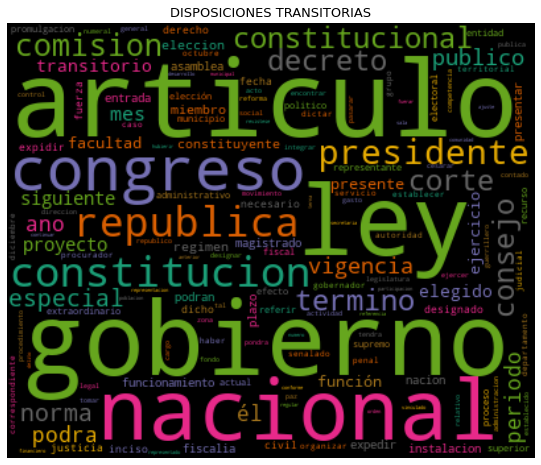

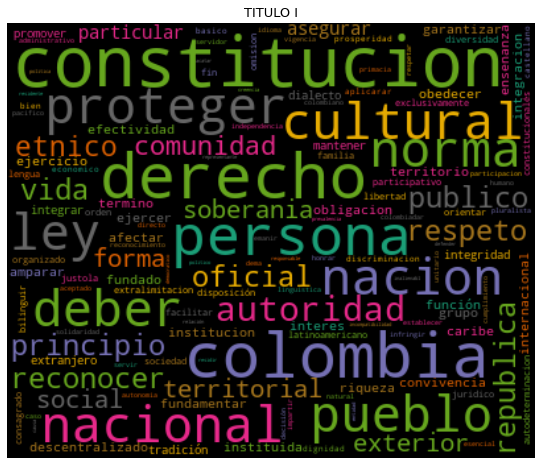

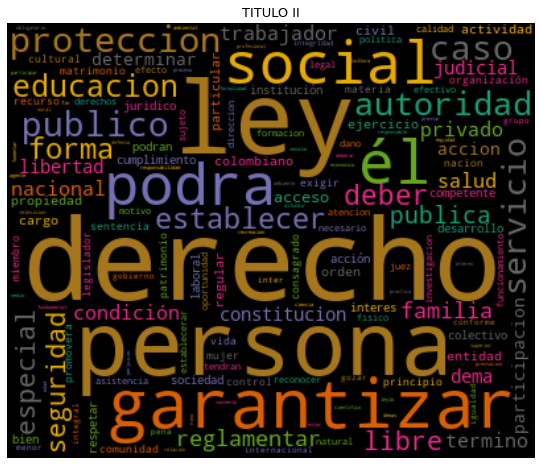

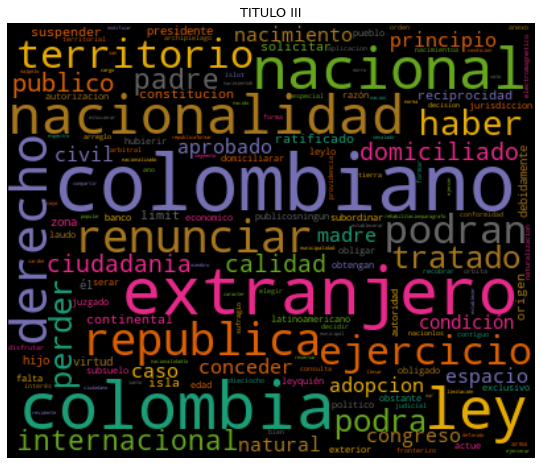

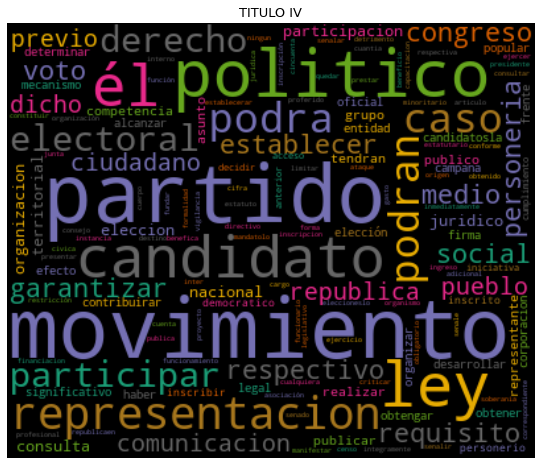

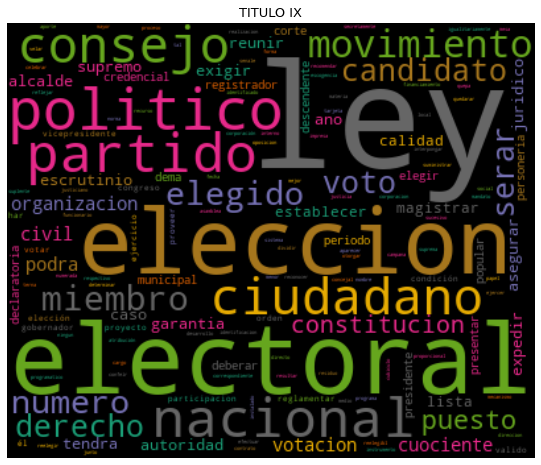

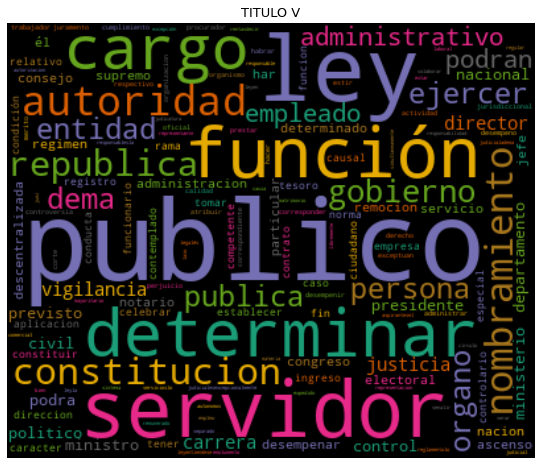

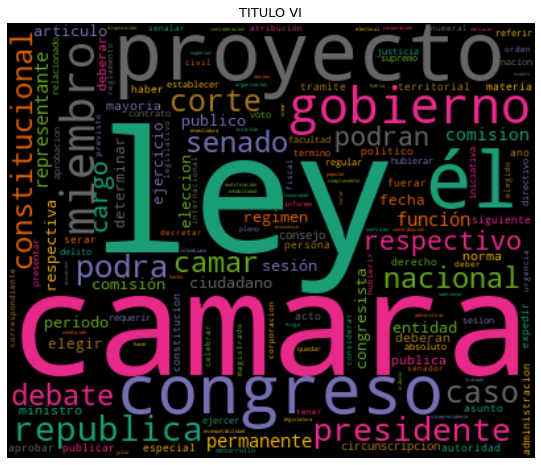

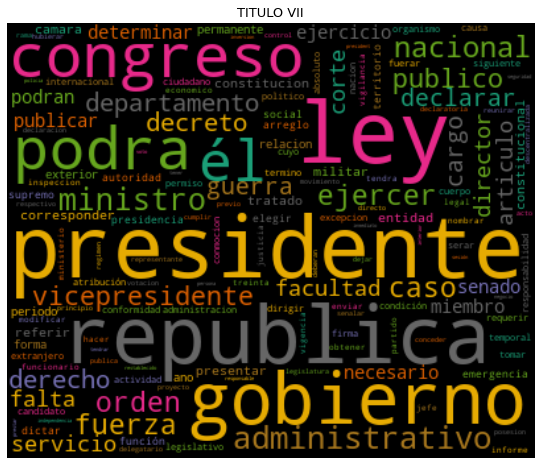

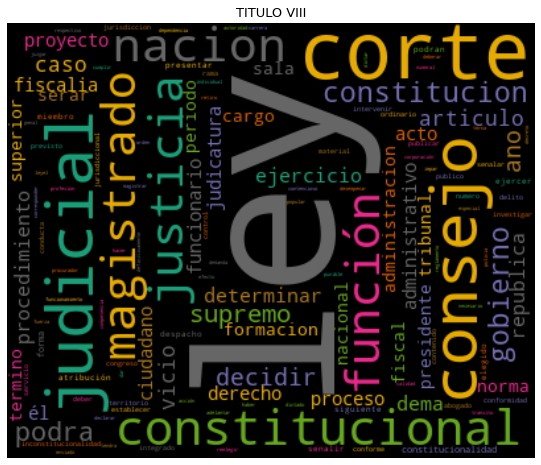

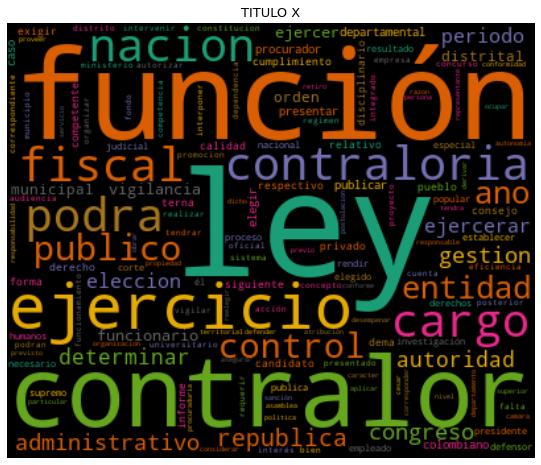

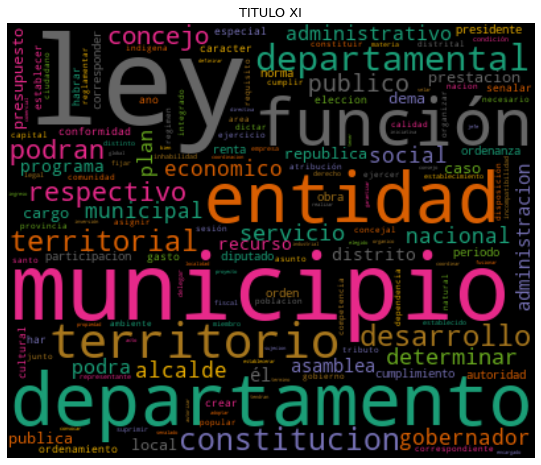

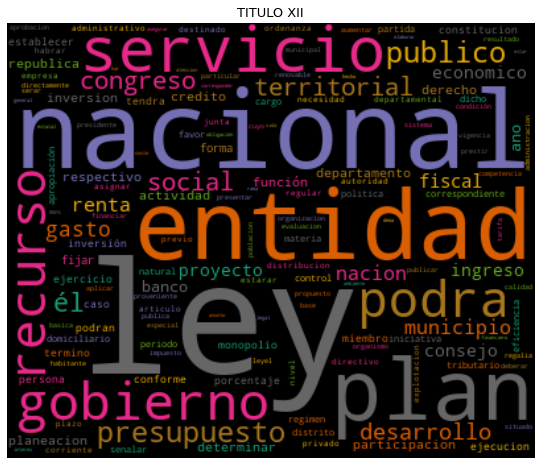

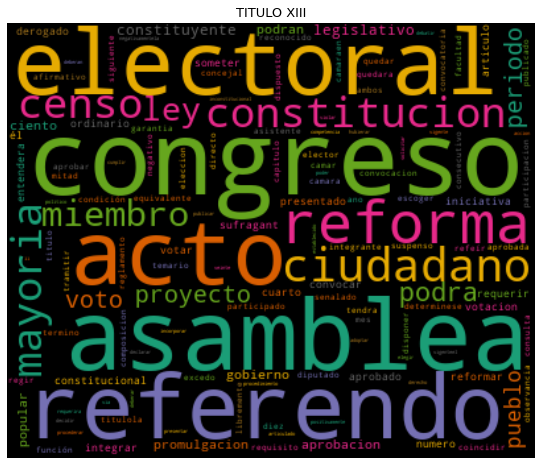

In [21]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each title
for index,Titulo in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[Titulo].sort_values(ascending=False),Titulo)

## Tree plot

In [ ]:
from treelib import Node, Tree
tree = Tree()
df.reset_index(inplace=True)


In [ ]:
for index, row in df.iterrows():
    if row['NombreCapitulo'] == None:
        df['NombreCapitulo'][index] = f"{df['Titulos'][index],df['Capitulos'][index]}"

In [ ]:
df=df.assign(idT = (df['Titulos']).astype('category').cat.codes)
df=df.assign(idC = (df['Titulos'] + '_' +df['NombreCapitulo']).astype('category').cat.codes)
df['idA'] = range(len(df))

In [ ]:
tree.create_node("Constitucion","Cons") #root

In [ ]:
#Node and Child creation
for index, row in df.iterrows():
    if not tree.contains((f"Tit{row['idT']}")):
        tree.create_node(row['Titulos'],(f"Tit{row['idT']}"), parent='Cons')
    if not tree.contains((f"Cap{row['idC']}")):
        tree.create_node(row['Capitulos'],(f"Cap{row['idC']}"),parent=(f"Tit{row['idT']}"))
    if not tree.contains((f"Art{row['idA']}")):
        tree.create_node(row['Articulos'],(f"Art{row['idA']}"),parent=(f"Cap{row['idC']}"))
    # print(index)

In [ ]:
tree.show()

In [ ]:
# dot = tree.to_graphviz(filename='Constitucion.gv')

In [ ]:

# from graphviz import Source
# dot = Source.from_file('Constitucion.gv')

In [ ]:
# dot.render('Constitucion.gv', view=True)  

# Funcion que cuente h1, h2 y articulos

### 2) Number of paragraphs

### 3) Number of words

### 4) Lematizacion y que pasa despues

### 5) Most frequent relevant words

## TFIDF / NMF / LDA